In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import matplotlib.pyplot as plt
import pandas as pd

https://paperswithcode.com/sota/document-summarization-on-cnn-daily-mail

In [2]:
fontname = None
def hist_dataframe(df, names=None, title=None):
    if not names: names=list(df.columns)
    if 'index' in names: names.remove('index')
    if 'id' in names: names.remove('id')
    width_num = len(names)
    fig = plt.figure(figsize=(12,2.6), dpi=300)
    axs = fig.subplots(1, width_num)
    for i, name in enumerate(names):
        mean = df[name].mean()
        max = df[name].max()
        axs[i].hist(df[name], bins=50, color='lightblue')
        axs[i].axvline(mean, zorder=5, color='red')
        axs[i].set_yticks([])
        axs[i].set_xlabel(f"mean:{mean:.4f}\n max:{max:.4f}", color="red", fontname=fontname)
        axs[i].set_title(name.replace('_','-'))
        axs[i].set_xlim(0,1)
    if(title): fig.suptitle(title, fontsize=20, y=0.93, fontweight=600, fontname=fontname)
    # plt.subplots_adjust(wspace=0.2)
    plt.tight_layout()
    plt.show()
    return fig

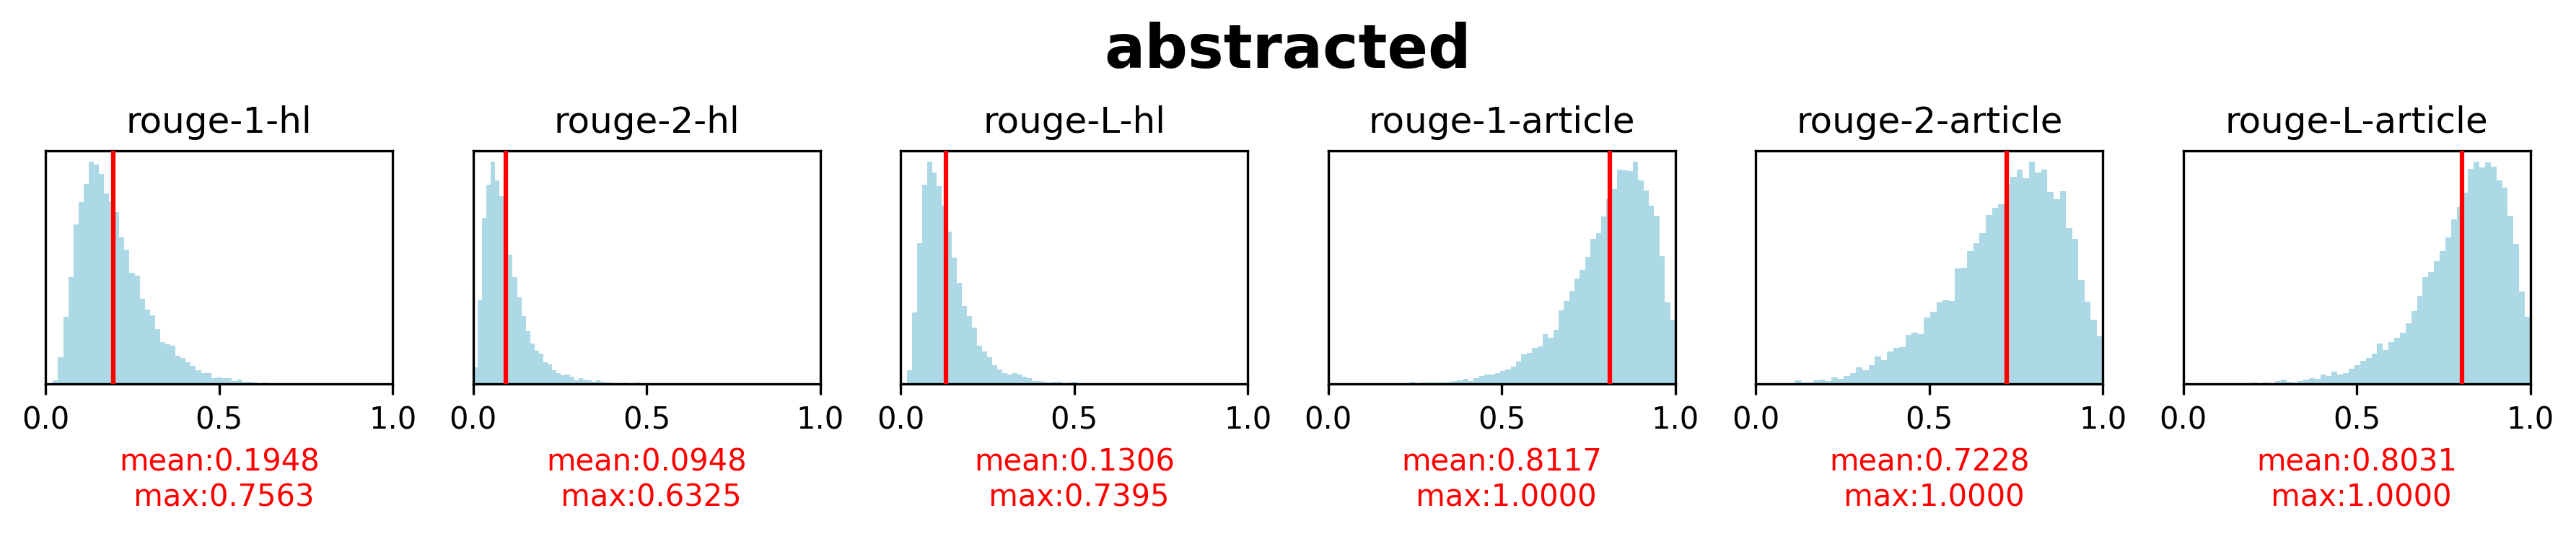

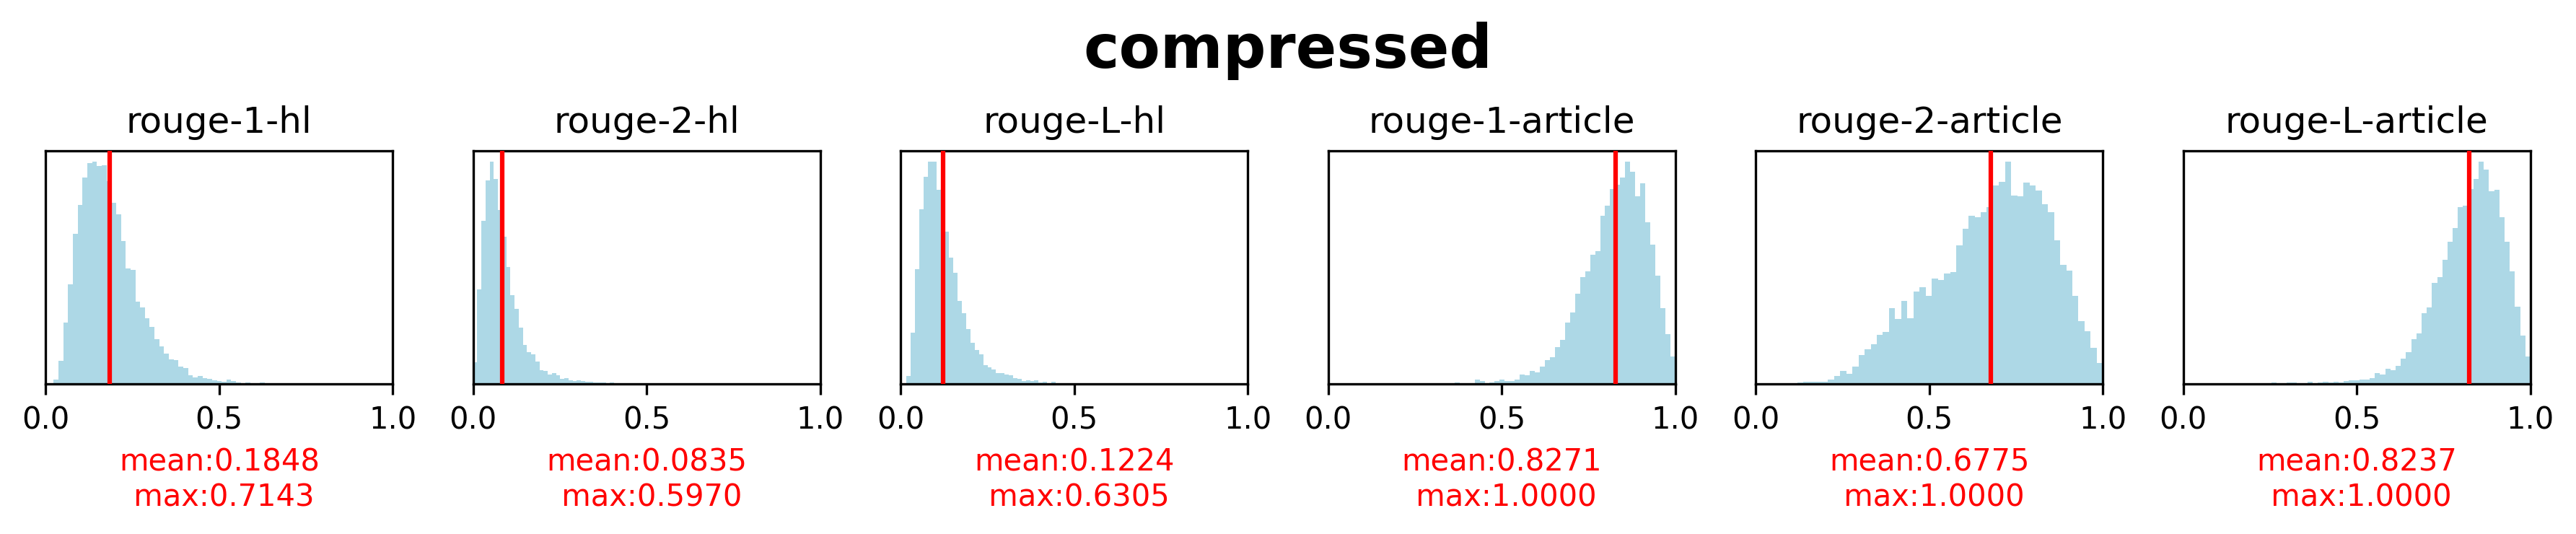

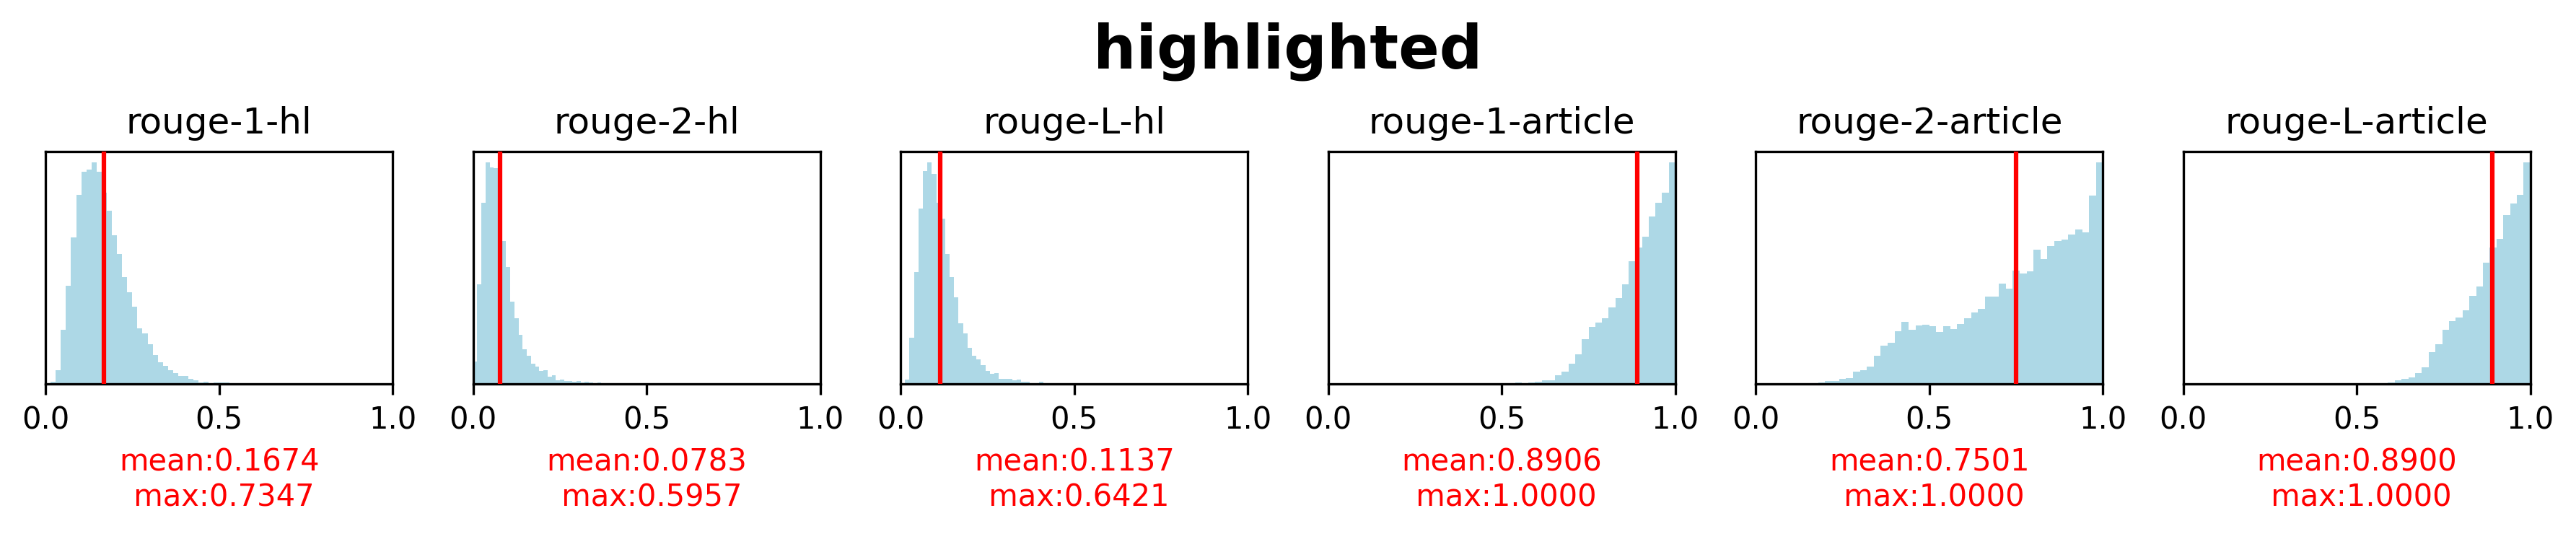

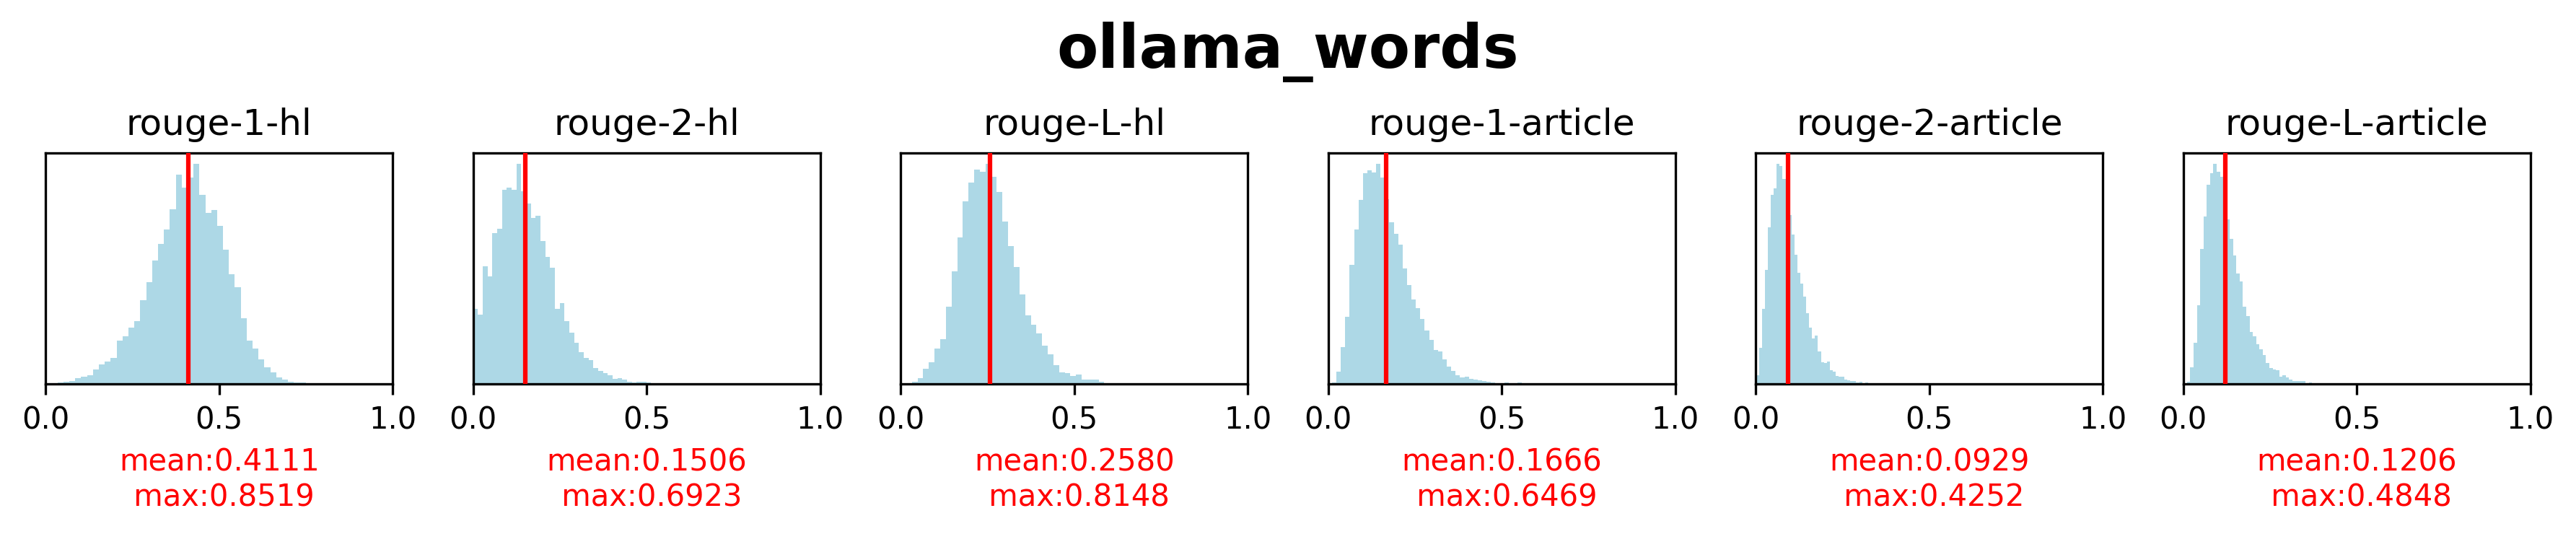

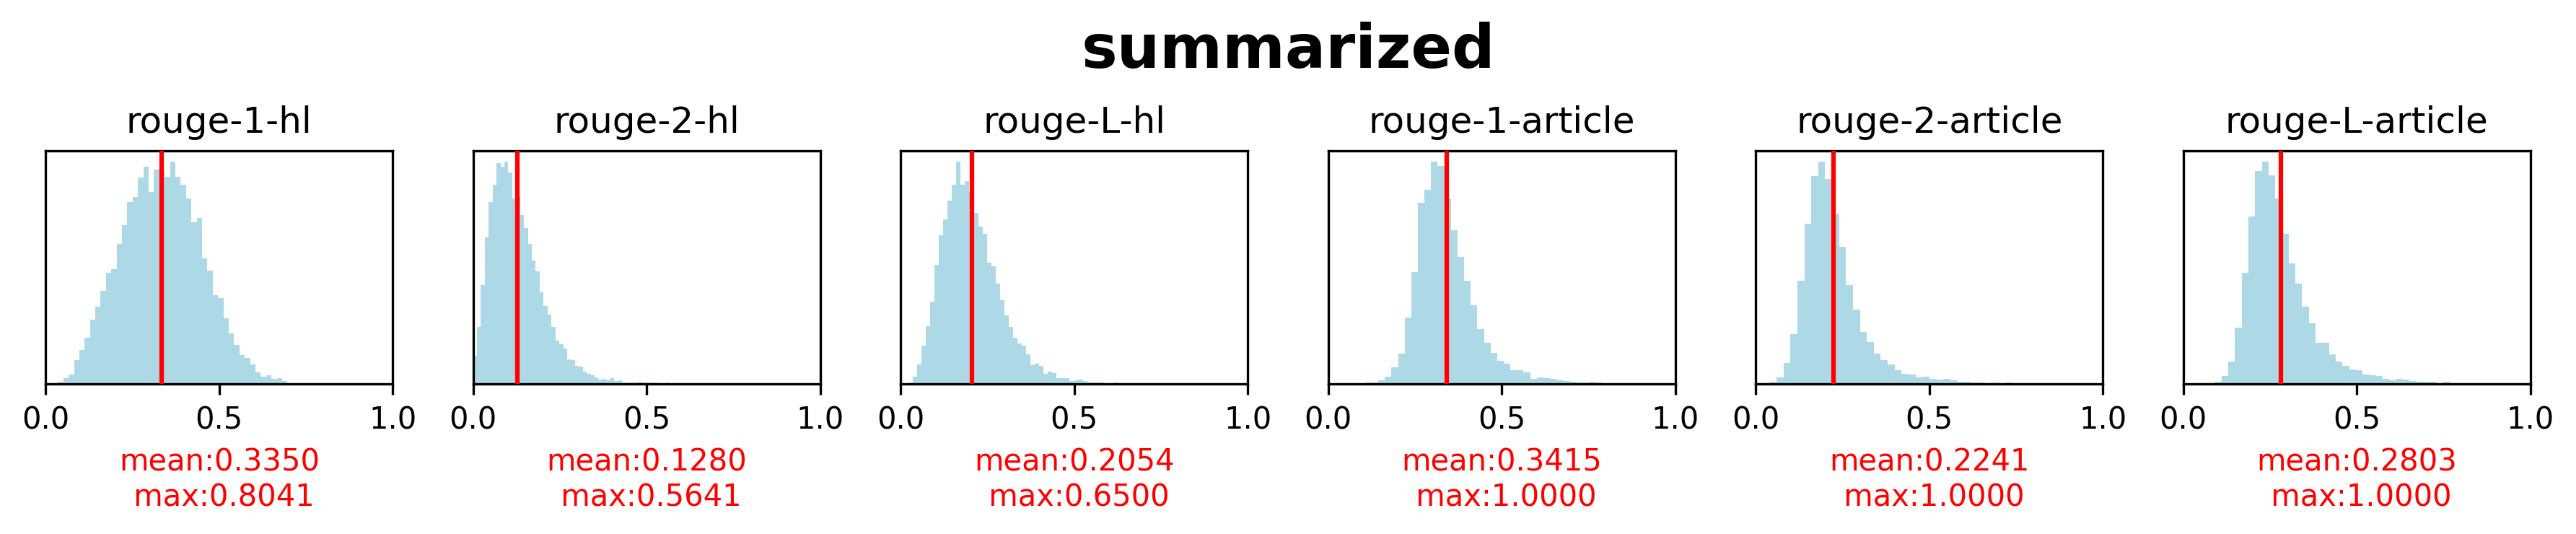

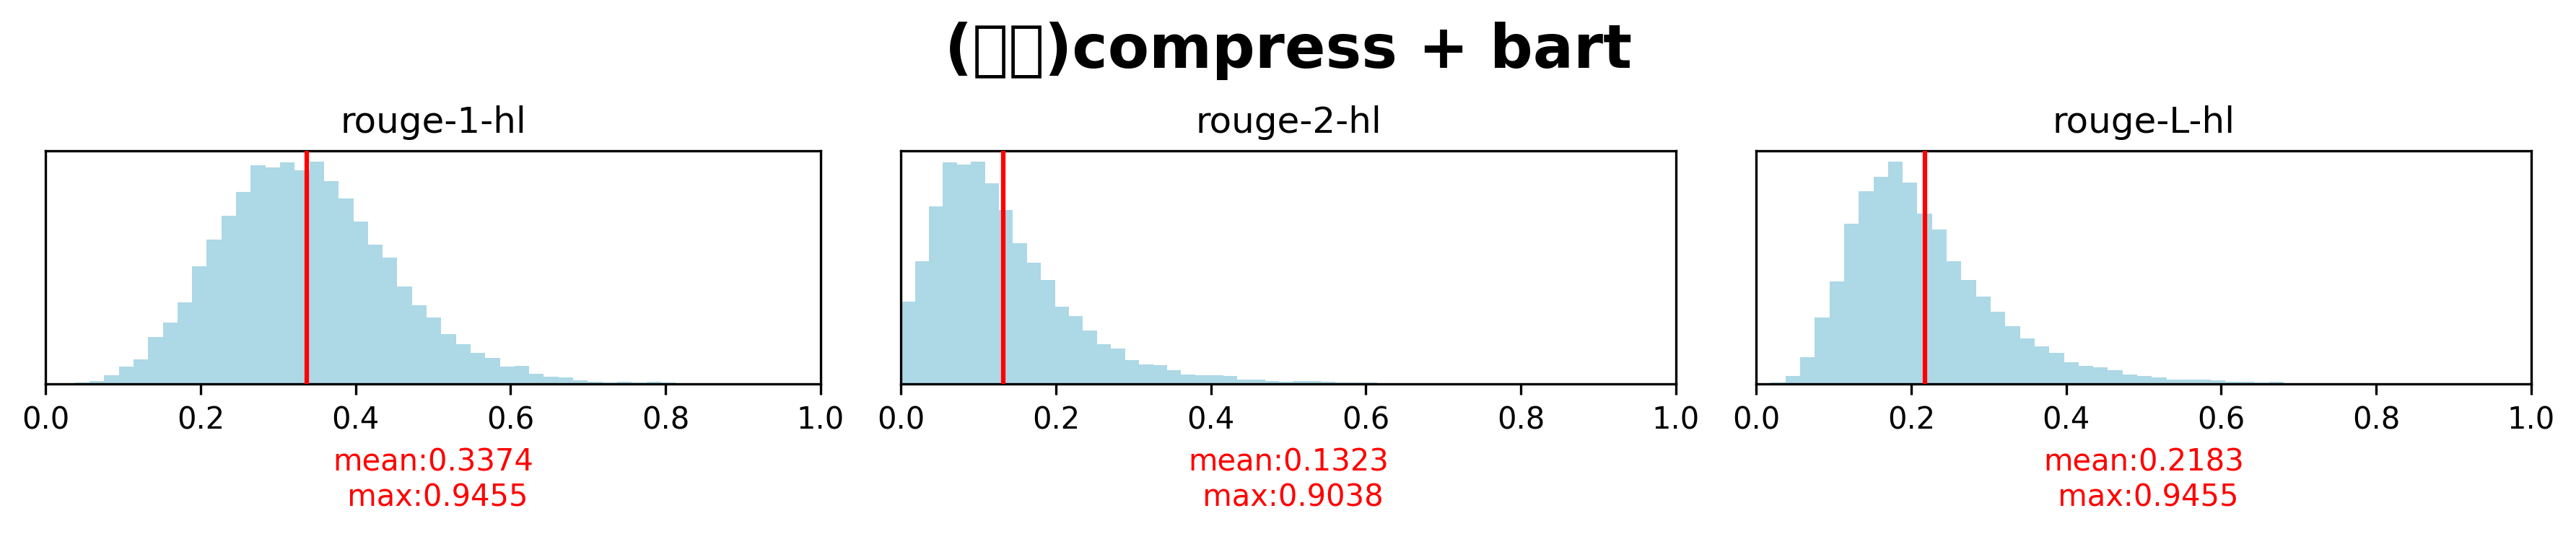

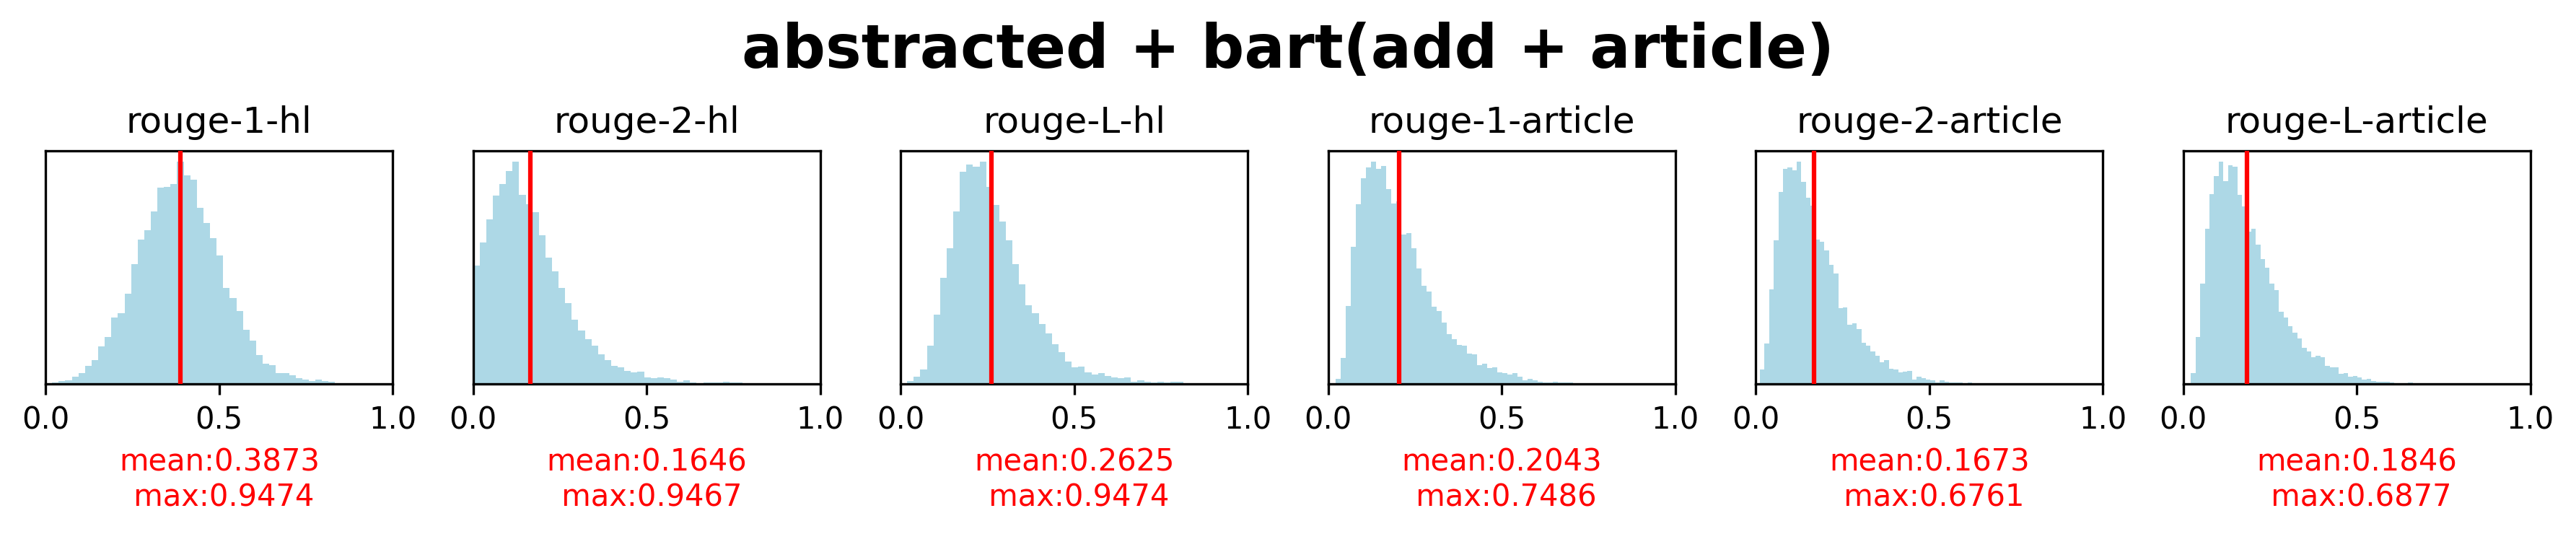

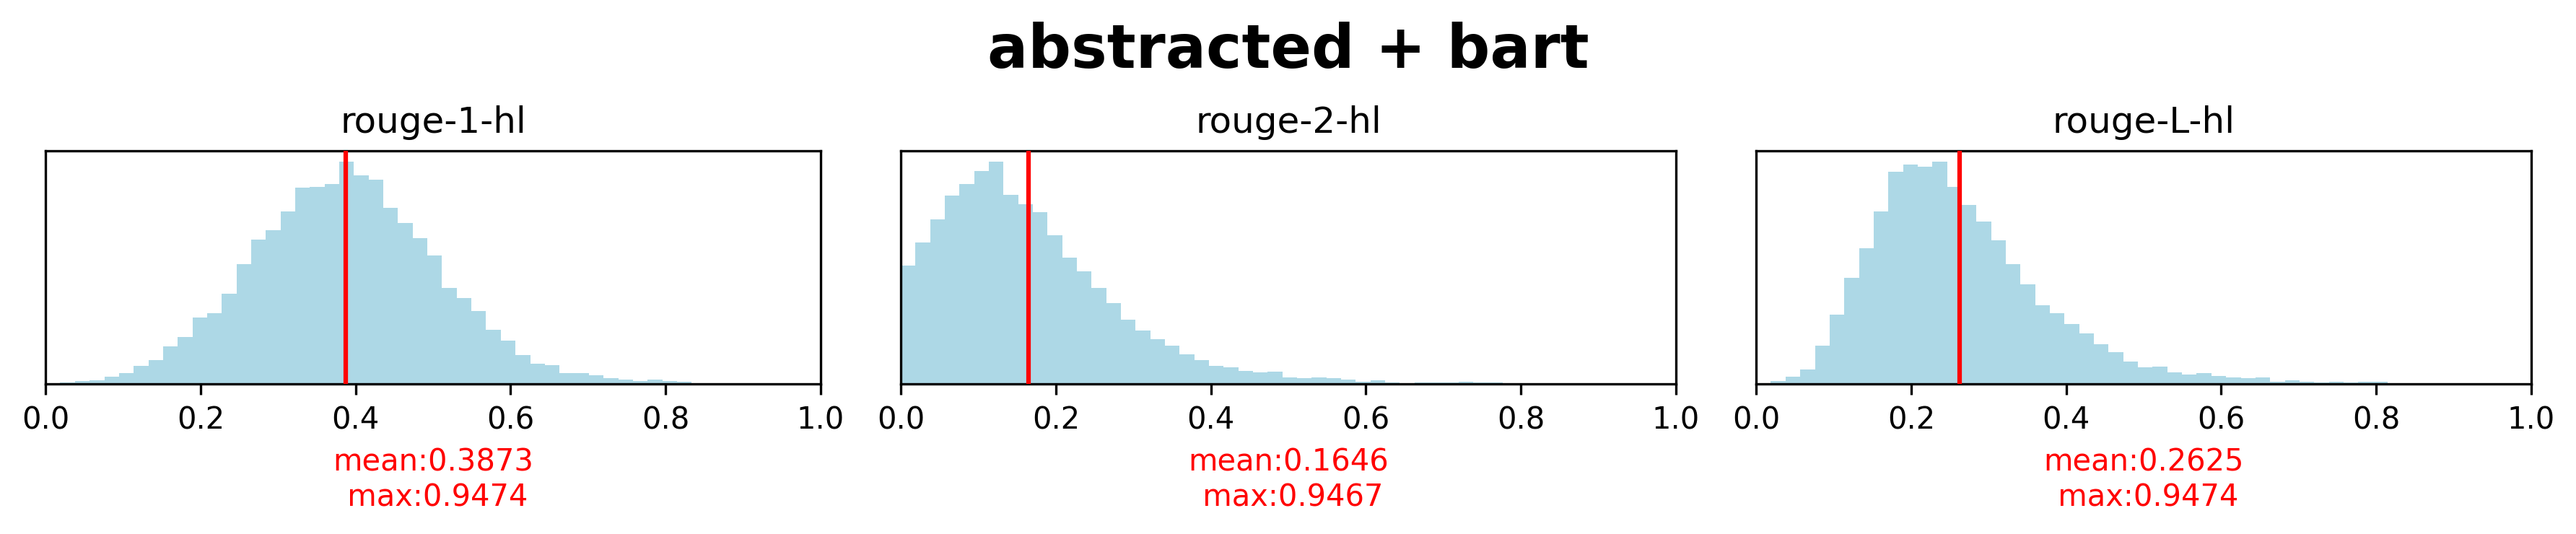

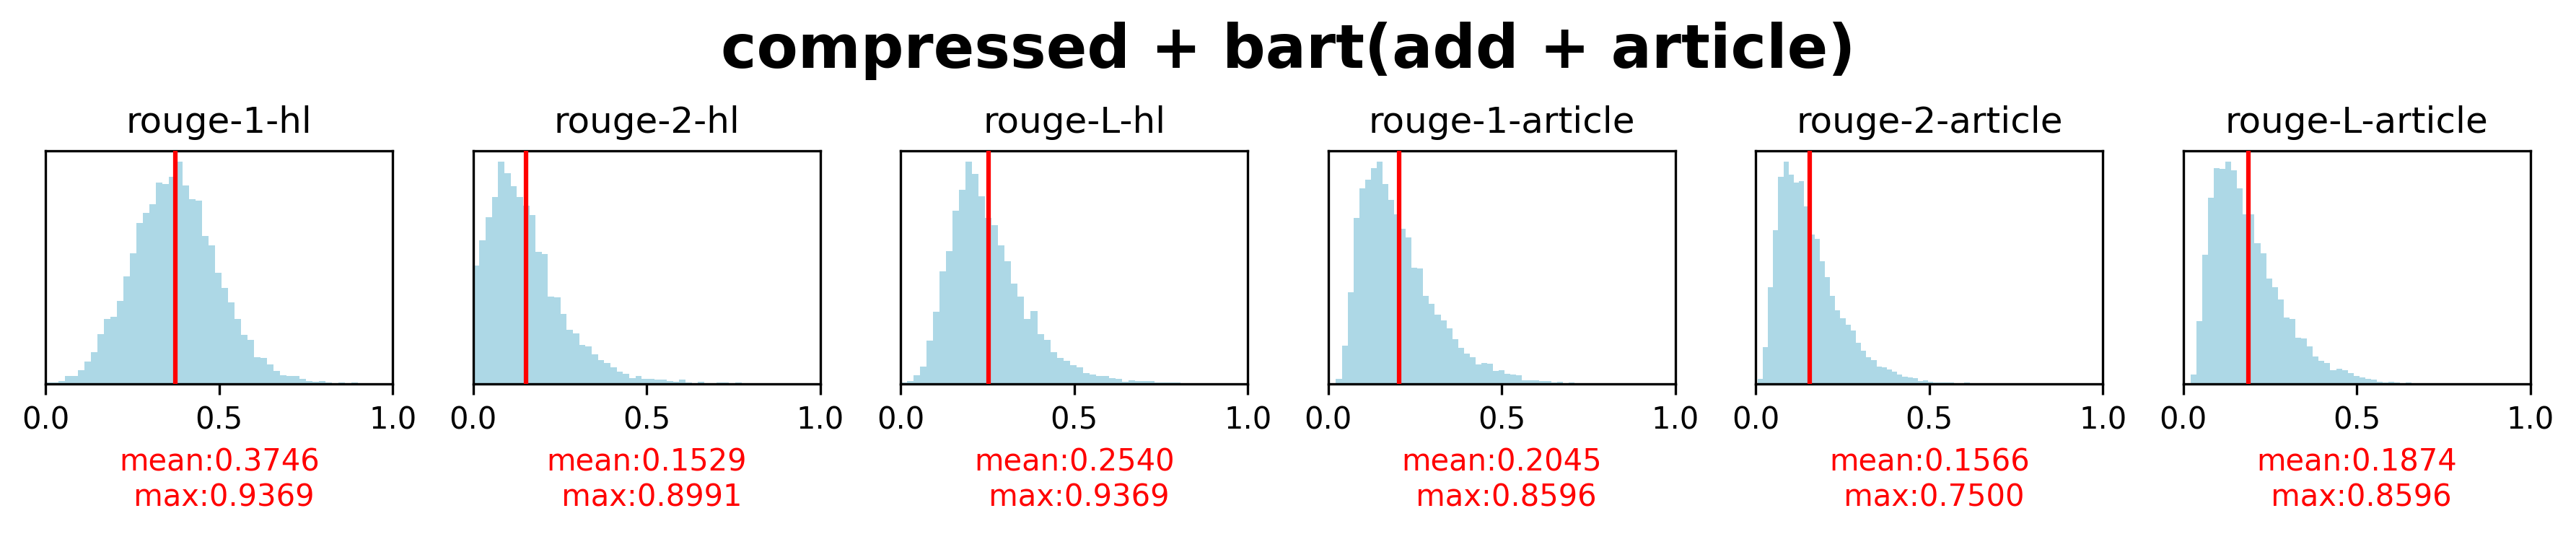

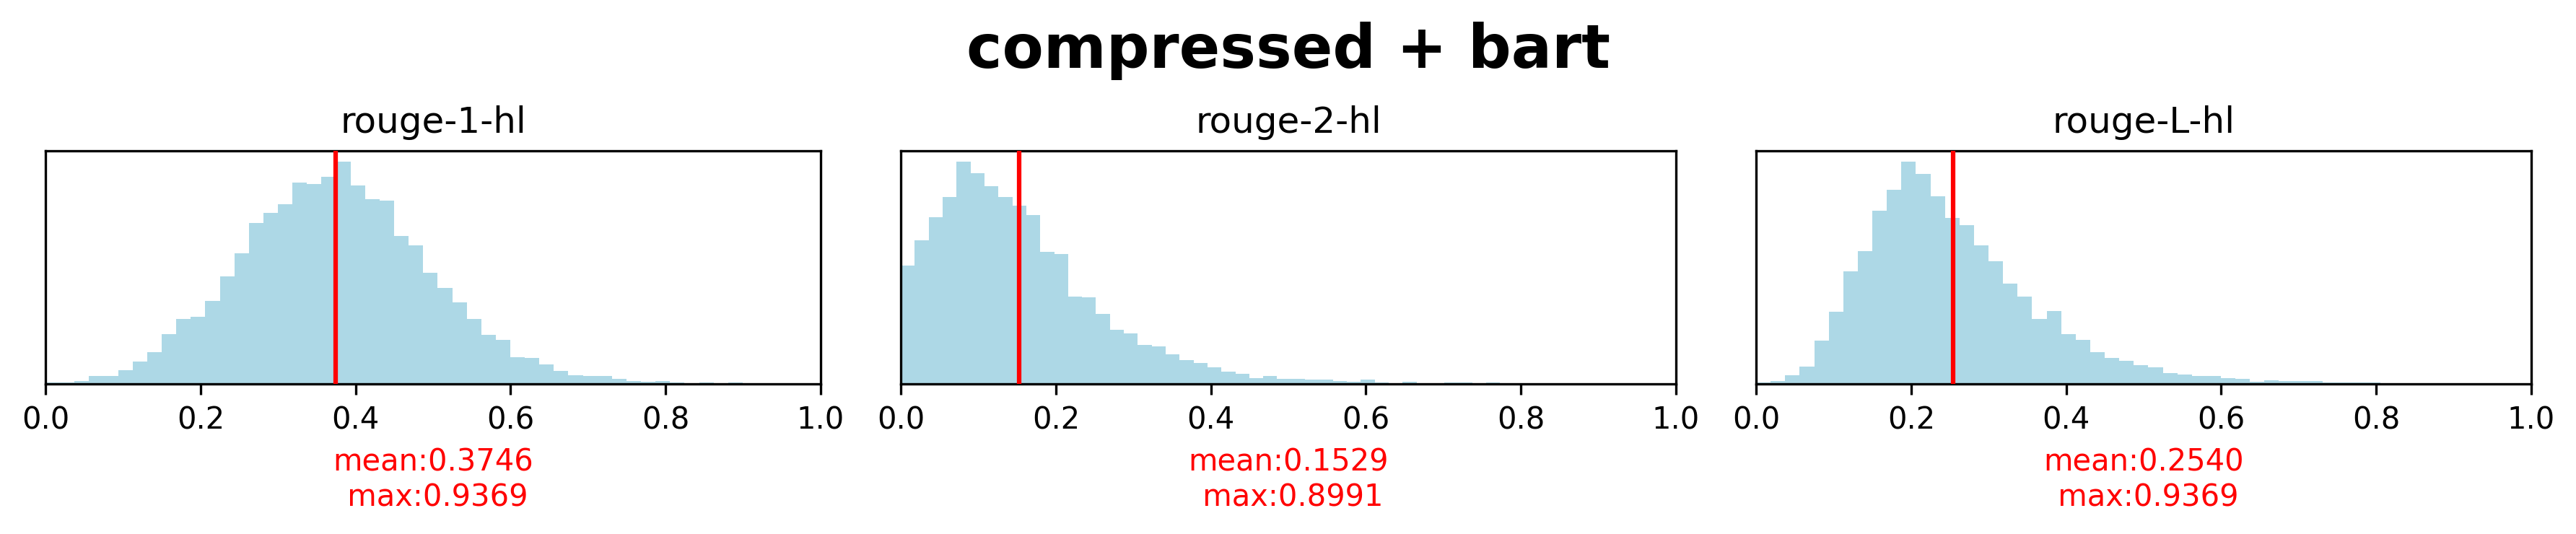

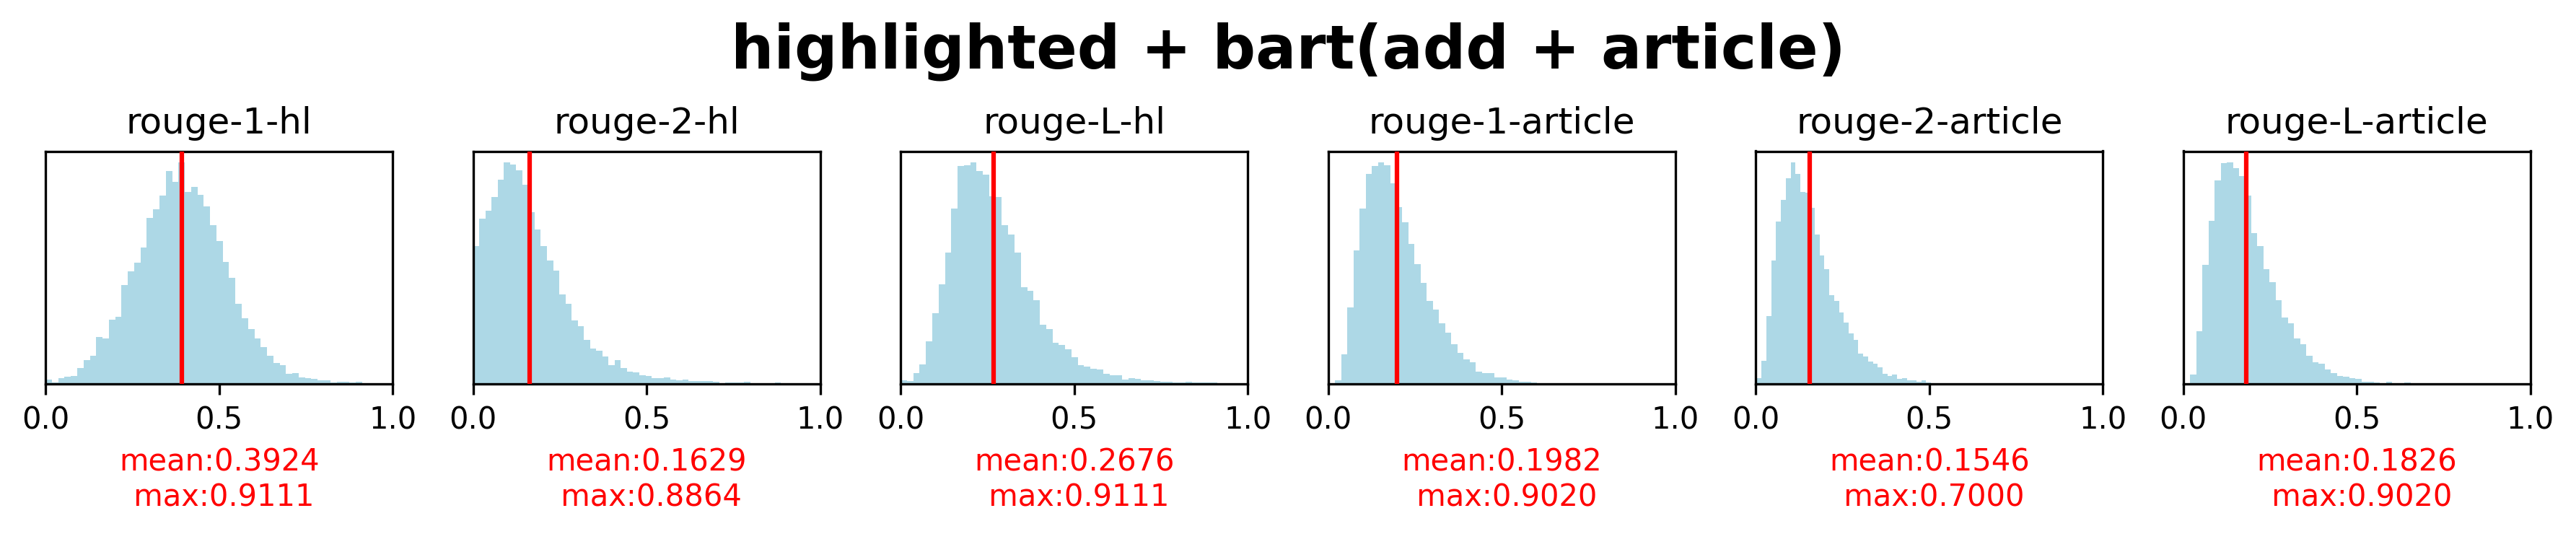

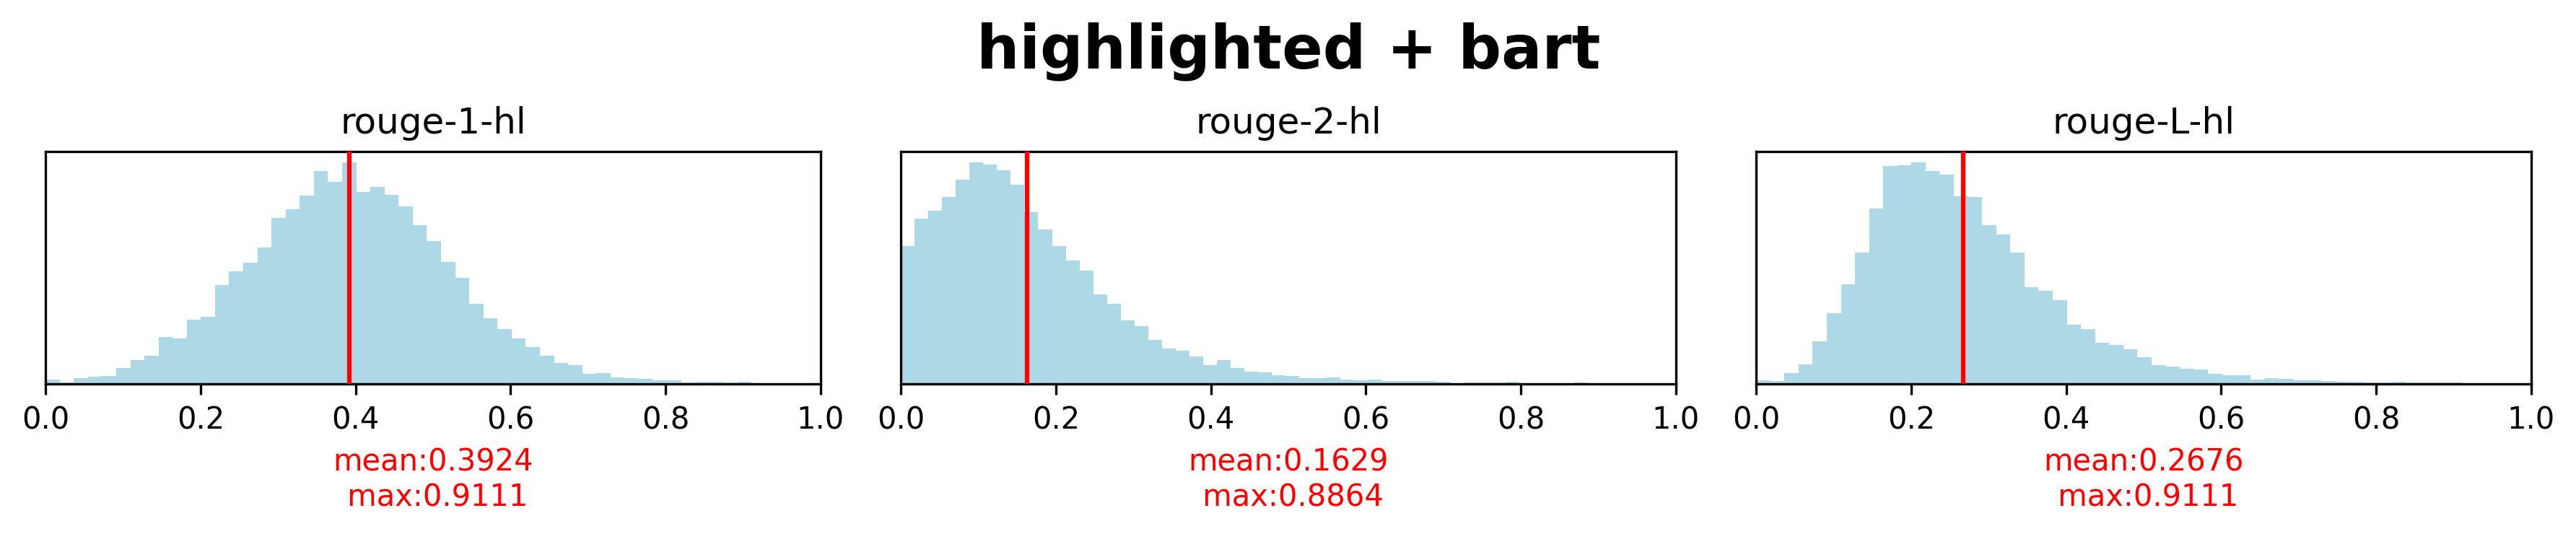

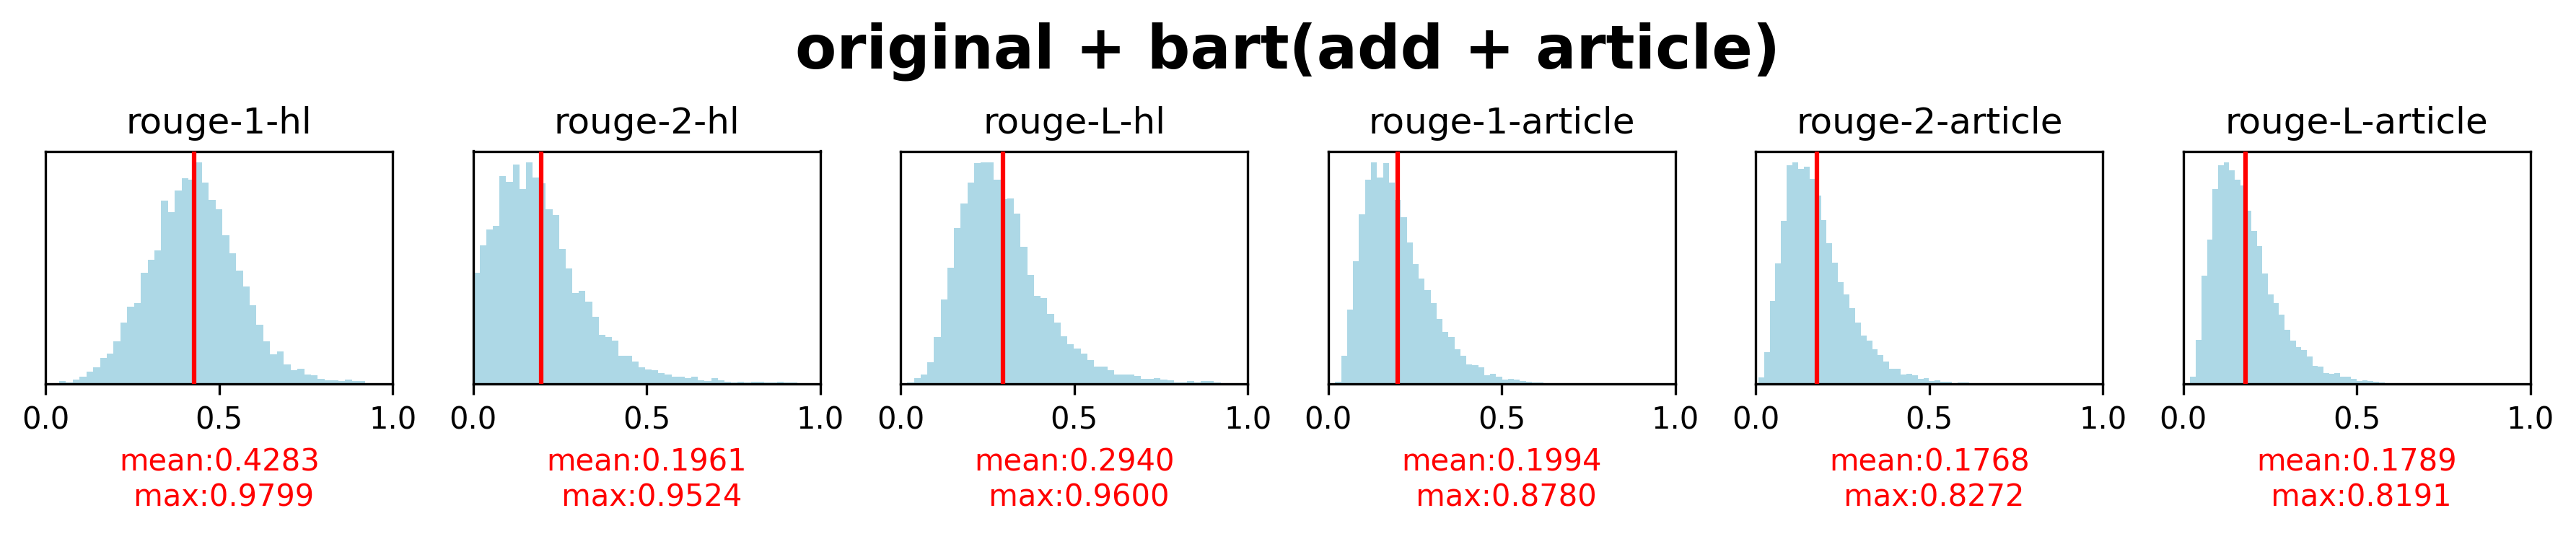

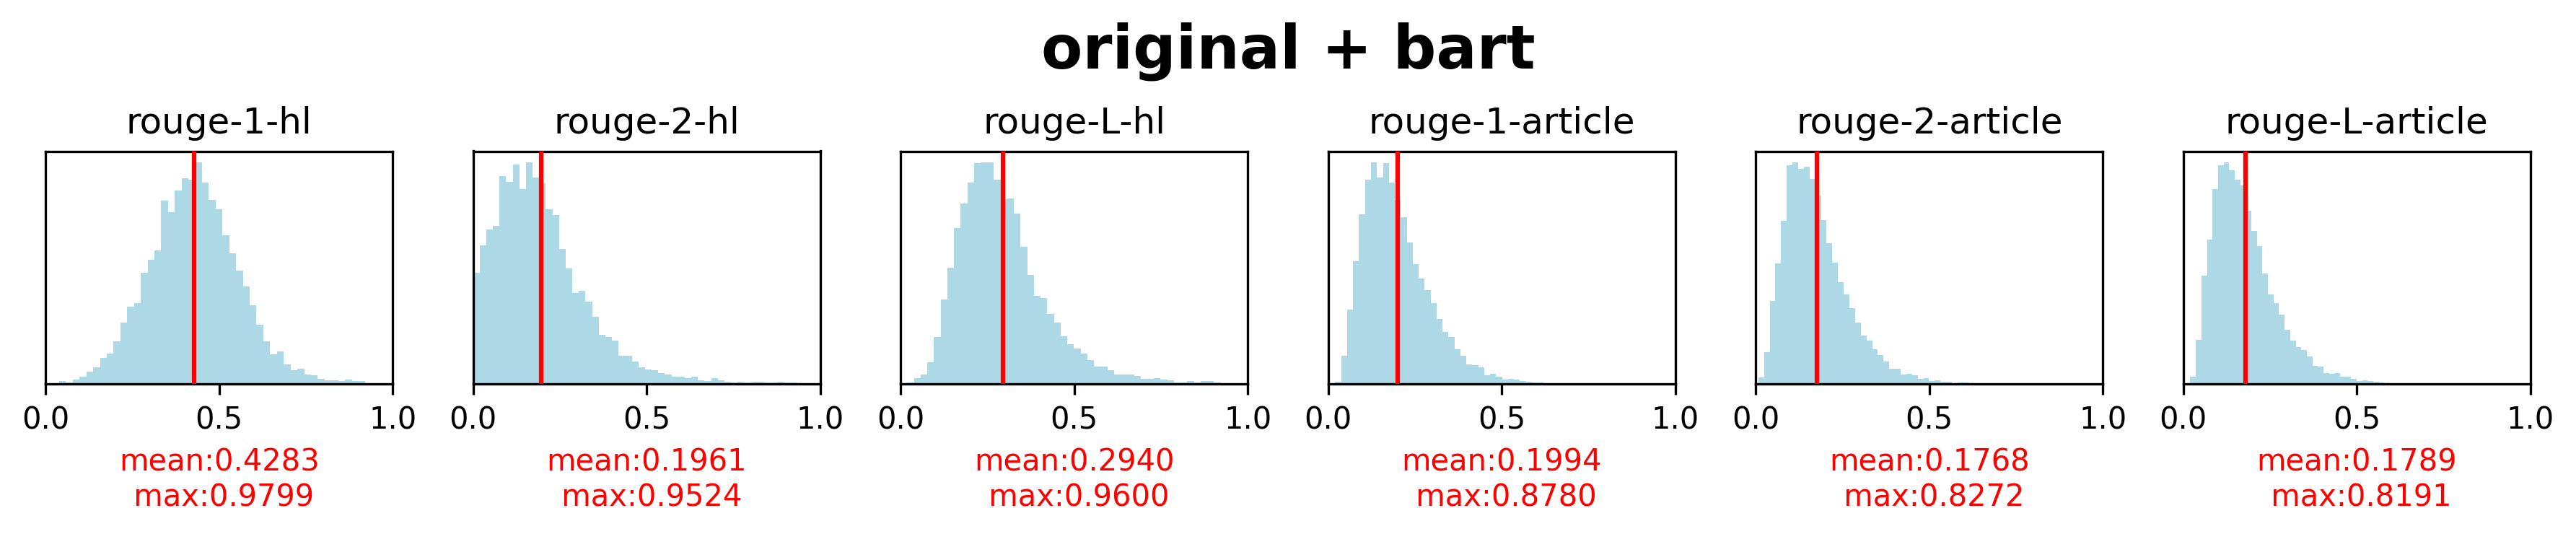

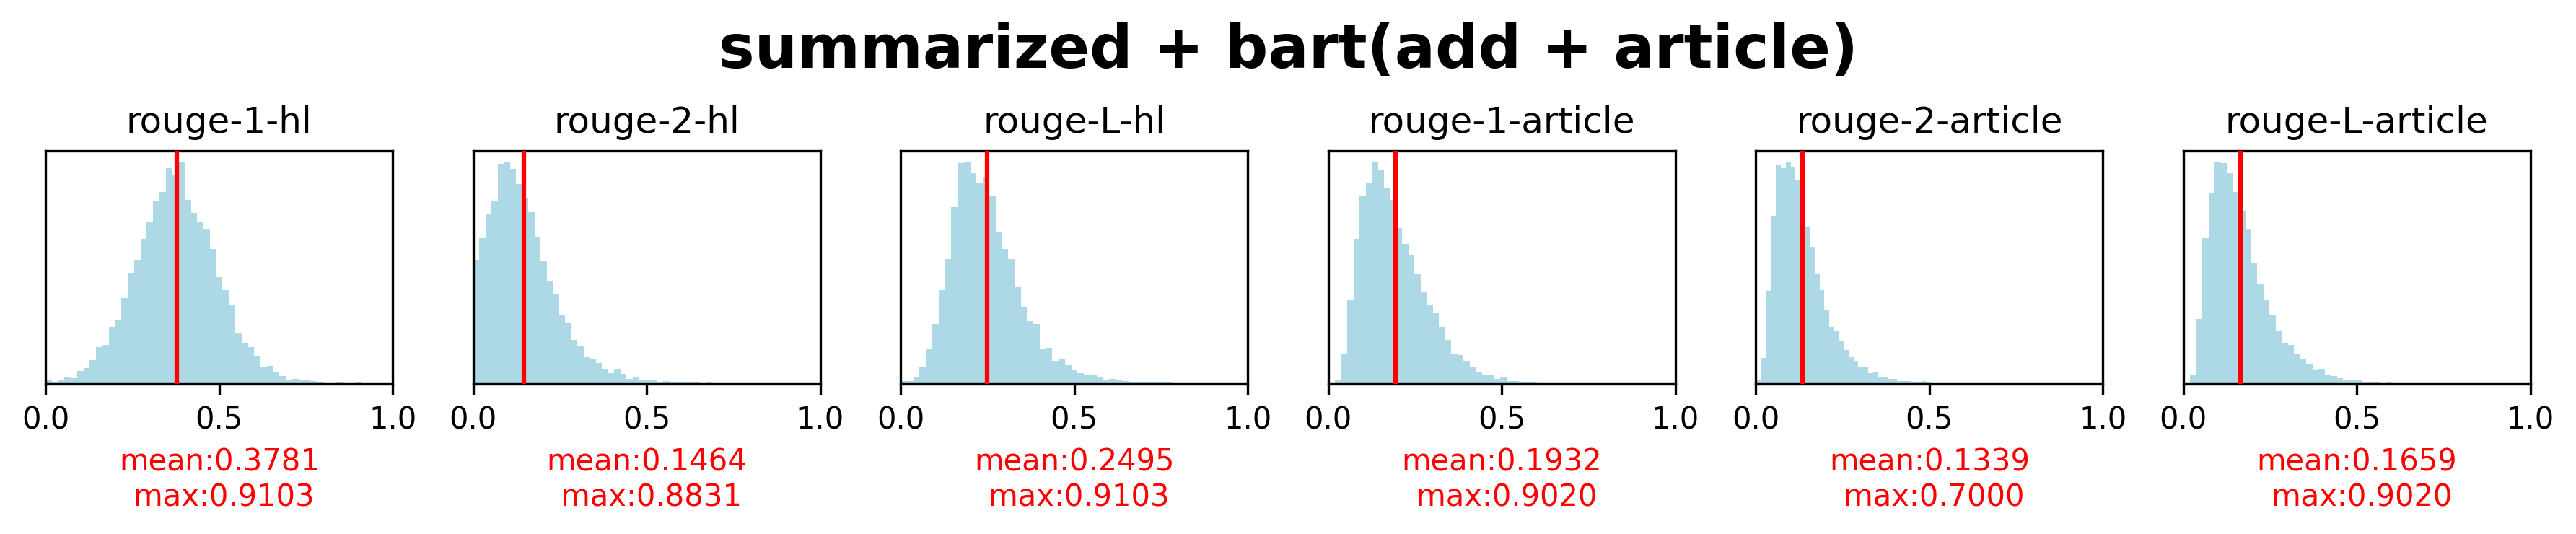

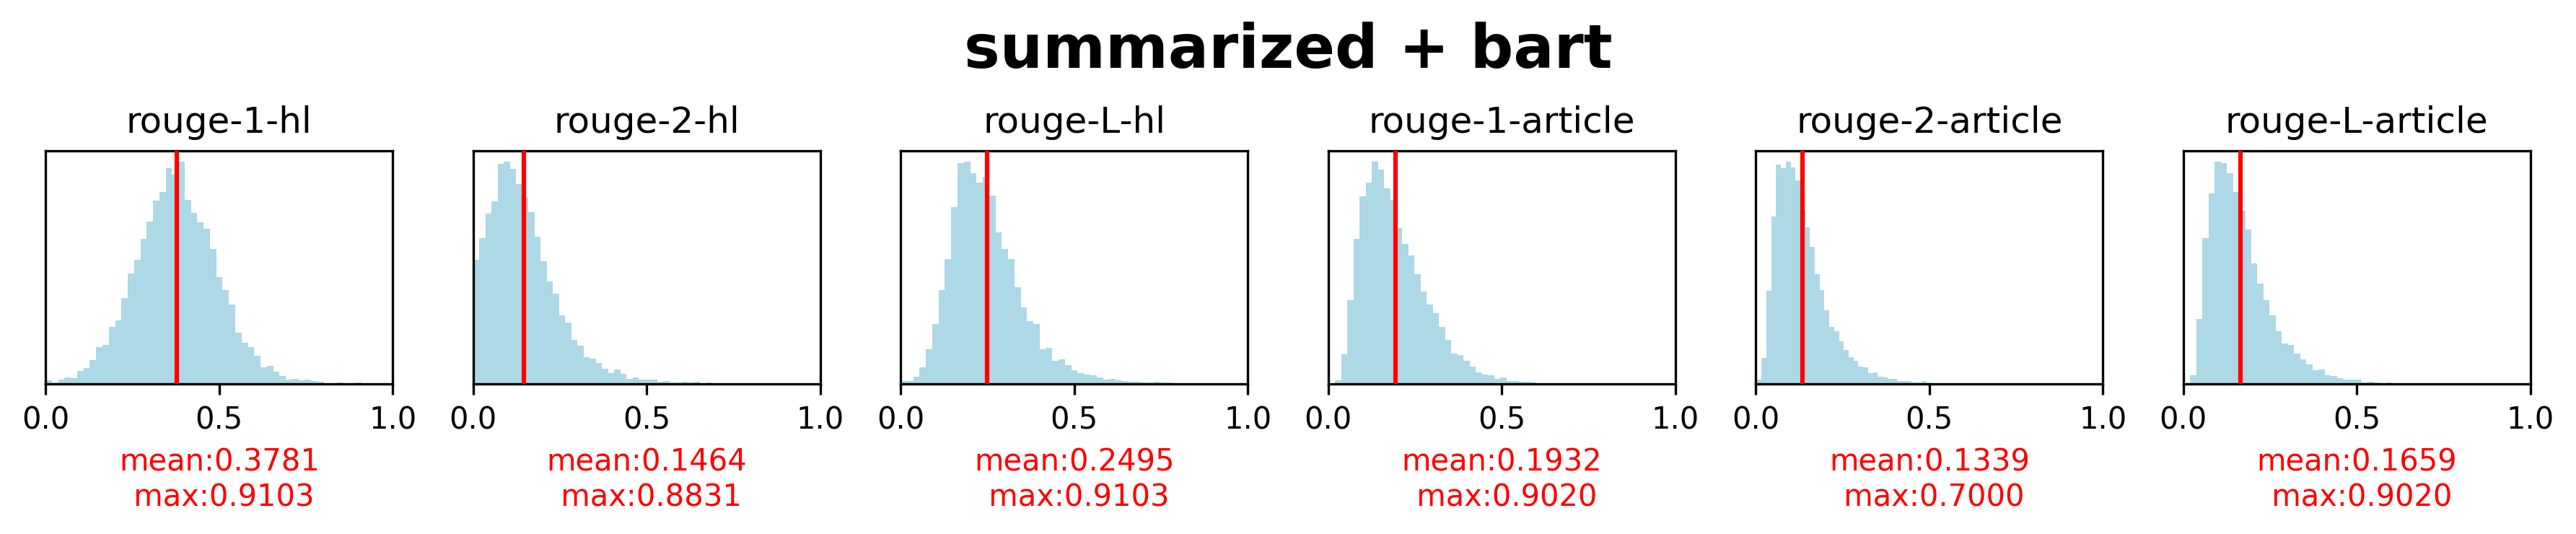

In [3]:
sorted_file_list = sorted(os.listdir('./dat/'), key=lambda x: 'bart' in x)
for file_path in sorted_file_list:
    if not file_path.startswith('rouge_scores-'): continue
    process_name = os.path.basename(file_path).split('.')[0].split('-',1)[1].replace('-',' + ')
    
    df = pd.read_csv('./dat/'+file_path)
    fig = hist_dataframe(df, title=process_name)
    fig.savefig('./result/'+file_path.split('.csv')[0]+'.svg')